## **WEEK 2 EXERCISES - ANOVA**
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop

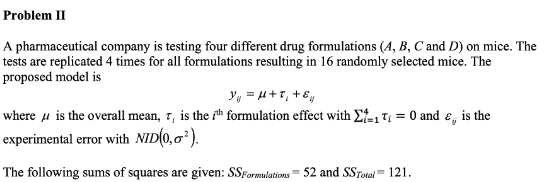

 - τᵢ = how much group i’s mean deviates from μ.
## Q1
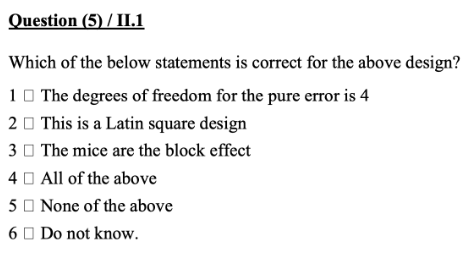

**Replicates:** 4 per level → total N = 16.

**Design:** Completely randomized one-way ANOVA.

**Sums of squares:** SS_Formulations = 52, SS_Total = 121.

**So SS_Error** = 121 − 52 = 69.

1. N-a = 16 - 4 = 12, derfor **forkert**

2. A Latin square requires 2 blocking factors (rows and columns) each with the same number of levels as the treatment factor. Here, we only have one factor (formulation) and no blocking. **forkert**

3. **forkert**

4. **korrekt**

---
## Q2
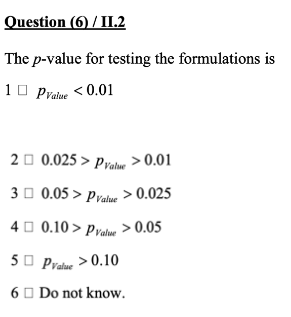

**1. Information we have:**

N = 16.

Replicates = 4

SS_Formulations = 52

SS_Total = 121

So SS_Error = 121 − 52 = 69

**2. Degrees of freedom:**
Treatments df = a − 1 = 4 − 1 = 3

Error df = N − a = 16 − 4 = 12

Total df = 15

**3. Mean squares:**

MST = SS_Formulations / df_Treatments = 52 / 3 ≈ 17.33

MSE = SS_Error / df_Error = 69 / 12 = 5.75

**Step 4: F-statistic**

F = MST / MSE = 17.33 / 5.75 ≈ 3.01

**Step 5: Find p-value**

We test with F(3, 12).

- Critical value at α = 0.05: F(3,12) ≈ 3.49

- Critical value at α = 0.10: F(3,12) ≈ 2.61

Since F = 3.01:

- F < 3.49 → not significant at 5%

- F > 2.61 → significant at 10%

So the p-value is between 0.05 and 0.10.

In [2]:
from scipy.stats import f

# Given values
SS_formulations = 52
SS_total = 121
SS_error = SS_total - SS_formulations  # 69
a = 4      # number of groups
n = 4      # replicates per group
N = a * n  # total observations

# Degrees of freedom
df_treatments = a - 1        # 3
df_error = N - a             # 12

# Mean squares
MS_treatments = SS_formulations / df_treatments
MS_error = SS_error / df_error

# F statistic
F = MS_treatments / MS_error

# p-value (right-tail probability)
p_value = 1 - f.cdf(F, df_treatments, df_error)

print("F =", F)
print("p-value =", p_value)


F = 3.014492753623188
p-value = 0.07194057917972452


**This confirms our manual result: 0.05 < p-value < 0.10.**

---

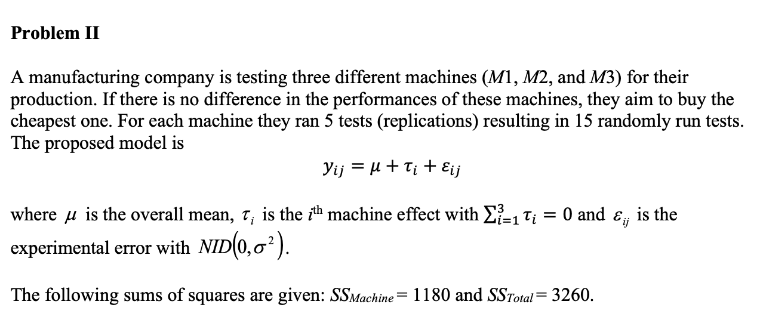

## Q3
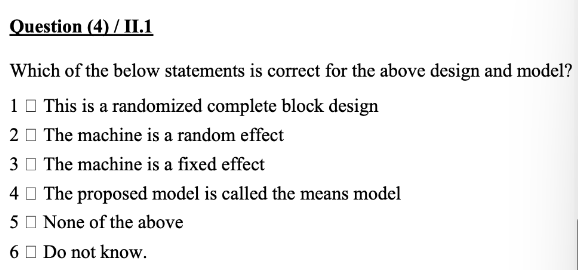

1. Randomized complete block design (RCBD) — No. There’s only one factor (Machine with 3 levels) and no blocking factor in the model. This is a one-factor completely randomized design.

2. Machine is a random effect — No. The model is written with treatment effects τ_i constrained to sum to zero; we’re comparing these specific machines (M1, M2, M3). That’s a classic fixed-effects one-way ANOVA. A random-effects model would treat machine levels as a random sample from a population and use a different inference target and EMS.

3. Machine is a fixed effect — Yes. We care about differences among these particular machines; τ_i are fixed treatment effects. - **correct**

4. Model is the means model — No. The displayed model is the effects model: y_ij = μ + τ_i + ε_ij with Στ_i = 0. The means model would be y_ij = μ_i + ε_ij (no sum-to-zero constraint).

5. None of the above — False, because (3) is correct.

---
## Q4
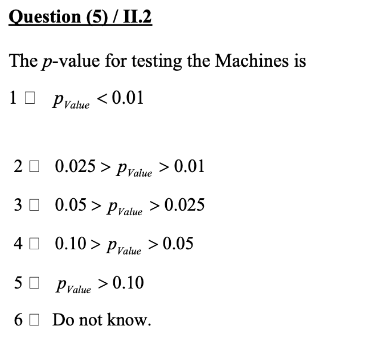

In [3]:
from scipy.stats import f

# Given values
SS_formulations = 1180
SS_total = 3260
SS_error = SS_total - SS_formulations  # 69
a = 3      # number of groups
n = 5      # replicates per group
N = a * n  # total observations

# Degrees of freedom
df_treatments = a - 1        # 3
df_error = N - a             # 12

# Mean squares
MS_treatments = SS_formulations / df_treatments
MS_error = SS_error / df_error

# F statistic
F = MS_treatments / MS_error

# p-value (right-tail probability)
p_value = 1 - f.cdf(F, df_treatments, df_error)

print("F =", F)
print("p-value =", p_value)


F = 3.4038461538461537
p-value = 0.06746436071191098


**aNSWER 4 IS CORRECT**

---
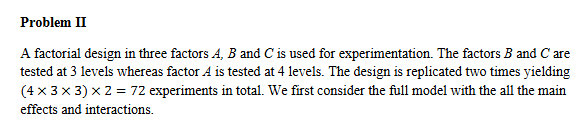
## Q5
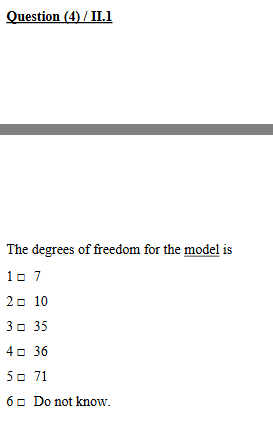

Number of treatment combinations = 4 × 3 × 3 = 36

Total observations = 36 × 2 = 72

Total degrees of freedom = N − 1 = 72 − 1 = 71

Total df = Model df + Error df

Model df = Total df - Error df = 72-36 = **35**

---
## Q6
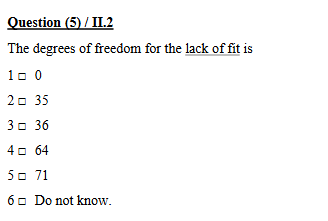

There are 4×3×3 = 36 distinct cells, each replicated 2 times.

Pure error df = r − 1 (r is replicates)

Pure error df = sum over cells of (replicates − 1) = 36×(2−1) = 36.

Lack-of-fit df = error df − pure error df = 36 − 36 = **0.**